In [70]:
# make sure matplotlib shows images inline
%matplotlib inline

In [71]:
# load packages
import os
import cv2
from keras.models import model_from_json
from PIL import Image
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [72]:
# set directory
os.chdir("C:/Users/j.schoonemann/Desktop/Jeanine/Hand_Sign_Recognition")

In [73]:
# load json and create model
json_file = open('my_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("my_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [78]:
def predict(model, img, target_size, top_n = 3):
    """Run model prediction on image
        model: keras model
        img: PIL format image
        target_size: (width, height) tuple
        top_n: # of top predictions to return
    """
    if img.size != target_size:
        img = img.resize(target_size)
        # print some extra information to the console
        print("the resized image has dimensions:", str(img.size))
        implot = plt.imshow(img)
        plt.show()
        
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    pred = model.predict(x)
    print(pred)
    pred_label = np.argmax(pred, axis = 1)

    return pred_label
    
    #preds = model.predict(x)
    #return decode_predictions(preds, top = top_n)[0]

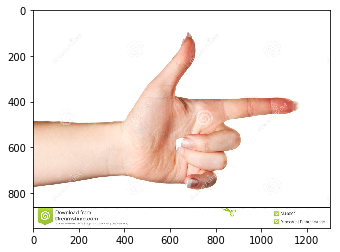

the dimensions of the image are: (1300, 953)
the resized image has dimensions: (64, 64)


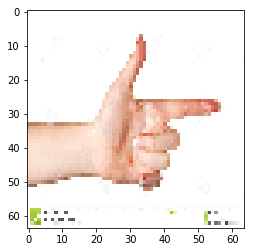

[[[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 ..., 
 [[ 255.  255.  255.]
  [ 157.  201.   46.]
  [ 246.  248.  245.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 208.  222.  173.]
  [ 154.  198.   43.]
  ..., 
  [ 234.  234.  234.]
  [ 249.  249.  249.]
  [ 255.  255.  255.]]

 [[ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  ..., 
  [ 255.  255.  255.]
  [ 255.  255.  255.]
  [ 255.  255.  255.]]]
[[[[ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   ..., 
   [ 255.  255.  255.]
   [ 255.  255.  255.]
   [ 255.  255.  

AttributeError: 'Model' object has no attribute 'predict_classes'

In [79]:
# check which modules are installed
#help("modules")

# read the test image
img = Image.open("image.jpg")

# show the test image
implot = plt.imshow(img)
plt.show()

print("the dimensions of the image are:", str(img.size))

# predict the number that is shown with a hand signal
predict(loaded_model, img, [64,64])

In [1]:
# turn on the camera
camera = cv2.VideoCapture(0)

# check if the camera is on
print("camera on: " + str(camera.isOpened()))

In [ ]:
# as long as the camera is on, read the images
while True:
    return_value,image = camera.read()
    # check if the camera gives an image
    if return_value:
        gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        cv2.imshow('image',image)
    if cv2.waitKey(1)& 0xFF == ord('s'):
        print ('stop!')
        break

# turn off the camera
camera.release()
cv2.destroyAllWindows()